# Regularization using Ridge, Lasso and ElasticNet Regression

Regularization is a method by which we introduce some bias into our model to reduce the variance. It is a way to stop data from overfitting our model. In this post, you will learn the concept behind regularization and see how it can be implemented through Ridge, Lasso and ElasticNet regression models.

## Contents

1. Understanding regularization
2. Ridge Regression
   * Implementation
3. Lasso Regression
   * Implementation
4. ElasticNet Regression
   * Implementation

## What is regularization?

In statistics, we have two main parameters to conisder. One is ***bias*** and the other one is ***variance***.
***Bias*** is the measure of difference between our estimate and the true population parameter.
***Variance*** is the measure of how spread out our estimates are. 

Graphically they can be understoof from the picture below. Consider te bull's eye to be the true population parameter and the blue dots as estimates.
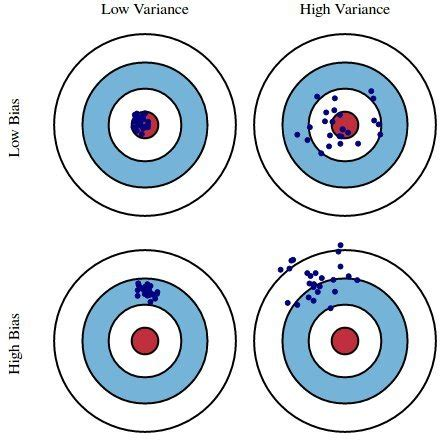
Any statistical or machine learning model should have low bias as well low variance, because a high variance means that the data has been overfitted, and a high bias means that the data has been underfitted (you can read more about underfit and overfit of data [here](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)).

Usually, it is a balance of both that will give you the best accuracy for a machine learning model. Regularization was introduced to reduce overfitting of data, or in other words, desensitize the output of our model to the input.

In case of a linear regression, we use the OLS (Ordinary Least Squares) method to find coefficients of the linear regression equation. OLS method takes care of the bias by keeping it low, but can lead to high variance, which consequently will give us poor predictions. Variance is increased when :
* Predictor/Feature variables have high level of correlation.
* There are too many predictors in the model.

For such cases, ***we reduce the variance by introducing a little bias***. This is what is called ***regularization***.
Ridge, Lasso and ElasticNet regressions are a way to regularize the Linear Regression models. Keep reading to learn their implementation and usage.

## Ridge Regression

Ridge regression, also called the L2 penalty, is obtained by adding a penalty for extra predictors to the linear regression equation. Let us once revisit the linear regression equation : 
                                
                                               y = x0 + b1*x1 + b2*x2
                                            
Here, \
x0 = intercept on y-axis \
      x1, x2 = predictor variables \
      b1, b2 = coefficients
      
In case of ridge regression, a penalty term proportional to the square of coefficients is introduced. Mathematically;

                                        y = x0 + b1*x1 + b2x2 + lambda(b1^2 + b2^2)
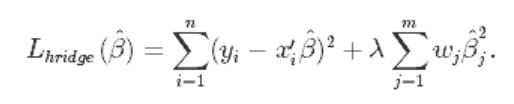
                                        
Here, \
lambda is the penalty term, which penalises addition of extra predictor variables. Ridge regression basically tries to shrink the coefficients and tries to reduce multicollinearity and model complexity.

### Implementation of Ridge Regression

For implementing ridge regression we are using the 'Advertising.csv' dataset that can be found on [Kaggle](https://www.kaggle.com/sazid28/advertising.csv). This dataset has 3 predictor variables and one output, 'sales'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("advertising.csv/Advertising.csv")
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


You can first check the values of coefficients and the mean squared error in case of a linear regression, and then later compare it with the results of ridge regression model.

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = data.drop(['sales'], axis=1)
y = data['sales']

linreg  = LinearRegression()

MSE = cross_val_score(linreg, X, y, scoring='neg_mean_squared_error', cv=5)

meanMSE = np.mean(MSE)

meanMSE

-3.07294659710021

In [3]:
linreg.fit(X, y)
linreg.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

Here you can see the results of our linear regression model. The MSE (Mean Square Error) is -3.07 and there are three coefficients for three predictor variables.
Now lets implement ridge regression and observe what how much the MSE and values of coefficients change.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha' : [1e-15, 1e-10, 1e-5, 1e-2, 1, 2, 5, 10, 20, 50, 100]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 10, 20,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

`alpha` parameter here is the value of penalty term 'lambda'. We have defined an array of values for `alpha` because we want to find the best suitable penalty term that minimises the variance while not increasing the bias too much. A very high value of lambda can lead to underfitting, which is not desired. You can do this using `GridSearchCV` or `RandomizedSearchCV`. We have used `GridSearchCV` here. The best value of `alpha` can then be found using `best_params_` attribute. 

In [7]:
ridge_regressor.best_params_

{'alpha': 100}

In [25]:
ridge_regressor.best_score_ #The MSE for best parameter

-3.0716375765484782

In [26]:
ridge = Ridge(alpha=100)
ridge.fit(X, y)
ridge.coef_ # Displays the coefficients

array([ 0.04576446,  0.18803935, -0.00091803])

The most suitable value of alpha/lambda is 100 and the MSE for this value of alpha is -3.071, which is not significantly lower than that of Linear Regression model.

But the noticeable thing here is that ridge regression has shrunk the size of the third coefficient from -0.001 to -0.0009. Thus, it has made a siginificant attempt at reducing the variance but hasnt created a lot of difference.
This is because ridge regression can only shrink the variables but cannot remove them altogther. For that cause, lasso regression is used. Lasso regression eliminates predictor variables that do not have much effect on the output.

## Lasso Regression

Lasso regression is also called as the L1 penalty. It also penalizes extra predictor variables but the equation of lasso regression considers absolute values of coefficients rather than the squares of coefficients, as you saw in ridge regression. Mathematically;

                                        y = x0 + b1*x1 + b2*x2 + lambda(|b1| + |b2|)
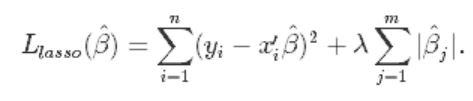
Here again, lambda penalizes extra feature variables but it can eliminate variables altogether if required.

### Implementation of Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 10e7) #We define the number of iterations as a very high number to avoid error messages.
                               # A higher number of iterations will also take longer to execute.

parameters = {'alpha' : [1e-15, 1e-10, 1e-5, 1e-2, 1, 2, 5, 10, 20, 50, 100]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, y)

C:\Users\Shruti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.2169839442834, tolerance: 0.45029244375
  positive)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 10, 20,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [17]:
lasso_regressor.best_params_

{'alpha': 2}

In [18]:
lasso_regressor.best_score_

-3.0300246975762115

In [19]:
lasso = Lasso(alpha=2)
lasso.fit(X, y)
lasso.coef_

array([0.045568  , 0.17893457, 0.        ])

The optimal value of alpha/lambda is 2 and the value of MSE is -3.03, which is siginificantly lower than that in linear and ridge regression. You will also observe that lasso regression has completely eliminated the third variable by reducing it's coefficient to zero. Thus, now our model uses only two predictor variables instead of three.
Lasso regression helps you to define feature importance.
It is different from ridge regression as it will lead to feature selection. 

The final kind of regularization is done by using `ElasticNet()` regression. This is midway between ridge and lasso.

## ElasticNet Regression

Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds.
Mathematically;

                          y = x0 + b1*x1 + b2x2 + lambda(b1^2 + b2^2) + lambda(|b1| + |b2|)
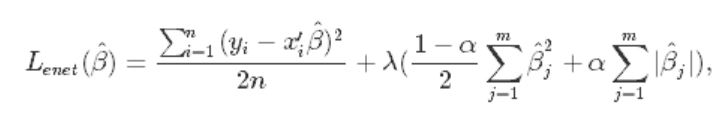
alpha here is mixing parameter between lasso and ridge. For alpha = 0, ridge regression and for alpha = 1, lasso regression.

ElasticNet is a combination of ridge and lasso and so it shrinks the coefficients while also selecting the important predictors only.

### Implementation of ElasticNet Regression

In [21]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(max_iter = 10e7)

parameters = {'alpha' : [1e-15, 1e-10, 1e-5, 1e-2, 1, 2, 5, 10, 20, 50, 100]}

enet_regressor = GridSearchCV(enet, parameters, scoring='neg_mean_squared_error', cv=5)

enet_regressor.fit(X, y)

C:\Users\Shruti\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242.1457618302689, tolerance: 0.45029244375
  positive)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=100000000.0,
                                  normalize=False, positive=False,
                                  precompute=False, random_state=None,
                                  selection='cyclic', tol=0.0001,
                                  warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 5, 10, 20,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [22]:
enet_regressor.best_params_

{'alpha': 2}

In [23]:
enet_regressor.best_score_

-3.041818692390015

In [24]:
enet = ElasticNet(alpha = 2)
enet.fit(X, y)
enet.coef_

array([0.04566309, 0.18263117, 0.        ])

The optimal value of alpha/lambda is again 2, like in Lasso regression and the MSE for this value is -3.04, which lies between ridge and lasso model of regression. ElasticNet has also eliminated the third variable of the model, like lasso regression.